<a href="https://colab.research.google.com/github/chalika-vanyaa/Dicoding-BMLP_Self_Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Chalika_Vanya_Resya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
# mount dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

fileName = '/content/drive/MyDrive/Online Courses/Dicoding/ML Engineer Track/ML FinPro/dataset/'
os.chdir(fileName)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# load csv file
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## **About Dataset**

Key Features:
- **TransactionID**: Unique alphanumeric identifier for each transaction.
- **AccountID**: Unique identifier for each account, with multiple transactions per account.
- **TransactionAmount**: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.
- **TransactionDate**: Timestamp of each transaction, capturing date and time.
- **TransactionType**: Categorical field indicating 'Credit' or 'Debit' transactions.
- **Location**: Geographic location of the transaction, represented by U.S. city names.
- **DeviceID**: Alphanumeric identifier for devices used to perform the transaction.
- **IP Address**: IPv4 address associated with the transaction, with occasional changes for some accounts.
- **MerchantID**: Unique identifier for merchants, showing preferred and outlier merchants for each account.
- **AccountBalance**: Balance in the account post-transaction, with logical correlations based on transaction type and amount.
- **PreviousTransactionDate**: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.
- **Channel**: Channel through which the transaction was performed (e.g., Online, ATM, Branch).
- **CustomerAge**: Age of the account holder, with logical groupings based on occupation.
- **CustomerOccupation**: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.
- **TransactionDuration**: Duration of the transaction in seconds, varying by transaction type.
- **LoginAttempts**: Number of login attempts before the transaction, with higher values indicating potential anomalies.

Source: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

> Berdasarkan informasi pada dataset, terdapat total 15 kolom dengan berbagai tipe data. Terlihat terdapat dua kolom yang merujuk kepada tanggal tetapi masih memiliki tipe data objek sehingga dapat diubah menjadi datetime.

In [ ]:
# convert date features into datetime type
df[['TransactionDate', 'PreviousTransactionDate']] = df[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [ ]:
# dropping TransactionId because it will not be used for further analysis
df.drop('TransactionID', axis=1, inplace=True)

> Karena kolom `TransactionID` hanya berupa sebuah kolom identifier yang unik untuk setiap baris, kolom ini dapat dihapus.

In [ ]:
# function to extract day, month, year, and hour from datetime
def extract_datetime(df, feat):
  df[f'{feat}_day'] = df[feat].dt.dayofweek
  df[f'{feat}_month'] = df[feat].dt.month
  df[f'{feat}_year'] = df[feat].dt.year
  df[f'{feat}_hour'] = df[feat].dt.hour

  # sine and cosine transformations for cyclical patterns for day, month, and hour
  df[f'{feat}_day_sin'] = np.sin(2 * np.pi * df[f'{feat}_day'] / 7)
  df[f'{feat}_day_cos'] = np.cos(2 * np.pi * df[f'{feat}_day'] / 7)

  df[f'{feat}_month_sin'] = np.sin(2 * np.pi * df[f'{feat}_month'] / 12)
  df[f'{feat}_month_cos'] = np.cos (2 * np.pi * df[f'{feat}_month'] / 12)

  df[f'{feat}_hour_sin'] = np.sin(2 * np.pi * df[f'{feat}_hour'] / 24)
  df[f'{feat}_hour_cos'] = np.cos(2 * np.pi * df[f'{feat}_hour'] / 24)

  return df

In [ ]:
# extracting datetime components in column TransactionDate and PreviousTransactionDate
datetime_feats = ['TransactionDate', 'PreviousTransactionDate']
for feat in datetime_feats:
  df = extract_datetime(df, feat)

> Langkah selanjutnya adalah untuk mengekstraksi beberapa komponen dari kolom datetime melalui fungsi `extract_datetime`, seperti informasi jam, hari, bulan, dan tahun transaksi. Dilakukan pula transformasi menggunakan fungsi sin dan cosine untuk data yang berpola siklik, seperti hari (dimana jarak hari ke-1 sama seperti hari ke-7), bulan (dimana jarak bulan ke-1 sama seperti bulan ke-12), dan jam (dimana jarak jam 00.00 sama seperti jam 24.00).

In [ ]:
# descriptive statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
TransactionAmount,2512.0,297.593778,0.26,81.885,211.14,414.5275,1919.11,291.946243
TransactionDate,2512,2023-07-05 20:32:10.826433024,2023-01-02 16:00:06,2023-04-03 16:22:05.750000128,2023-07-07 17:49:43.500000,2023-10-06 18:40:53.500000,2024-01-01 18:21:50,NaN
CustomerAge,2512.0,44.673965,18.0,27.0,45.0,59.0,80.0,17.792198
TransactionDuration,2512.0,119.643312,10.0,63.0,112.5,161.0,300.0,69.963757
LoginAttempts,2512.0,1.124602,1.0,1.0,1.0,1.0,5.0,0.602662
AccountBalance,2512.0,5114.302966,101.25,1504.37,4735.51,7678.82,14977.99,3900.942499
PreviousTransactionDate,2512,2024-11-04 08:09:22.219745024,2024-11-04 08:06:23,2024-11-04 08:07:53,2024-11-04 08:09:22,2024-11-04 08:10:53.249999872,2024-11-04 08:12:23,NaN
TransactionDate_day,2512.0,1.448248,0.0,0.0,1.0,3.0,4.0,1.51131
TransactionDate_month,2512.0,6.5625,1.0,3.0,7.0,10.0,12.0,3.47559
TransactionDate_year,2512.0,2023.005175,2023.0,2023.0,2023.0,2023.0,2024.0,0.071766


In [ ]:
# descriptive statistics of categorical columns
df.describe(include='object')

,AccountID,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation
count,2512,2512,2512,2512,2512,2512,2512,2512
unique,495,2,43,681,592,100,3,4
top,AC00362,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,Student
freq,12,1944,70,9,13,45,868,657


## **a. Univariate Analysis**

In [ ]:
# function to display data distribution and outliers
def plot_hist_bp(df):
  n_cols = 2
  n_rows = len(df.columns)

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))

  for i, col in enumerate(df.columns):
    # plot data distribution for each num column
    sns.histplot(x=df[col], kde=True, ax=axes[i, 0], color='teal', bins=30)
    axes[i, 0].set_title(f'Histogram of {col}')

    # plot outliers for each column
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

  plt.tight_layout()
  plt.show()

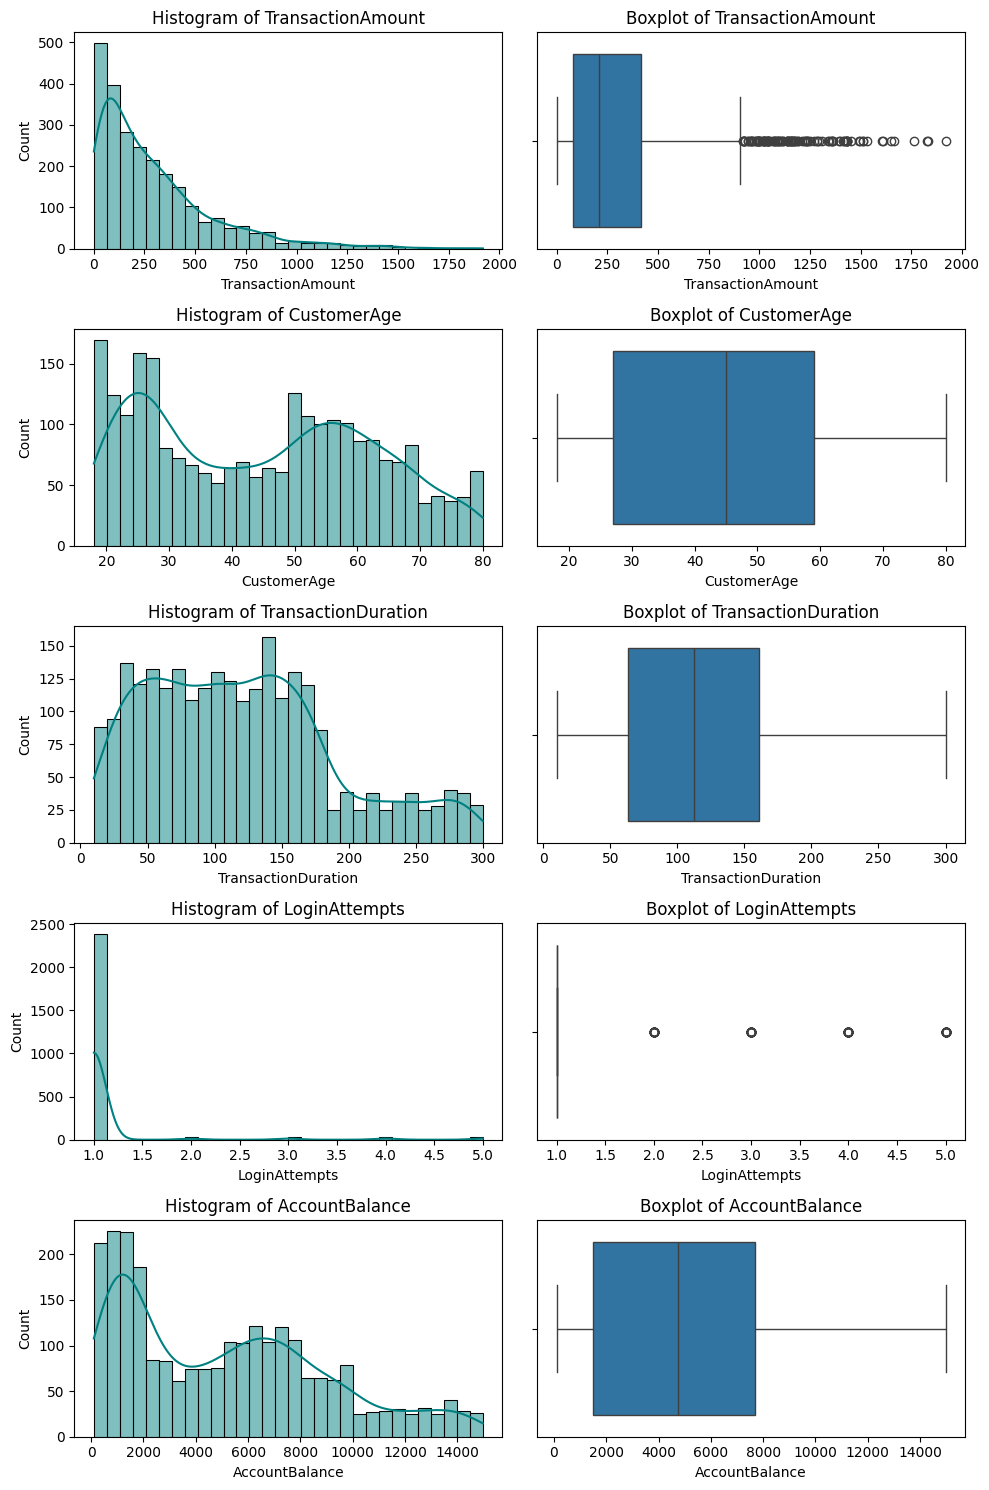

In [ ]:
# plot the data distribution and boxplot of the numerical features
num_features = df.select_dtypes('number')

plot_hist_bp(num_features[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']])

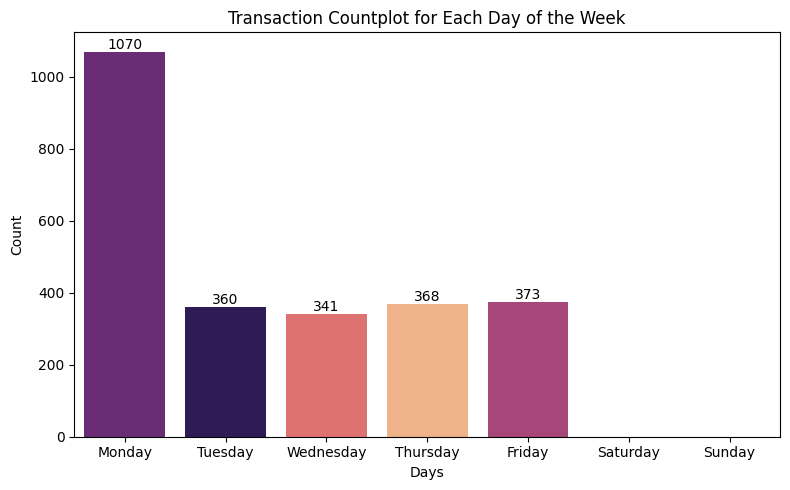

In [ ]:
# visualize the transaction count for each day of the week using countplot
plt.figure(figsize=(8,5))

# ordered by the name of the day
ax = sns.countplot(x=df['TransactionDate'].dt.day_name(), data=df,
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                   palette='magma', hue=df['TransactionDate'].dt.day_name())

# add a label to each bar
for container in ax.containers:
  ax.bar_label(container)

# set title and axis labels
plt.title('Transaction Countplot for Each Day of the Week')
plt.xlabel('Days')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

> Berdasarkan visualisasi di atas, transaksi paling banyak dilakukan di hari Senin.

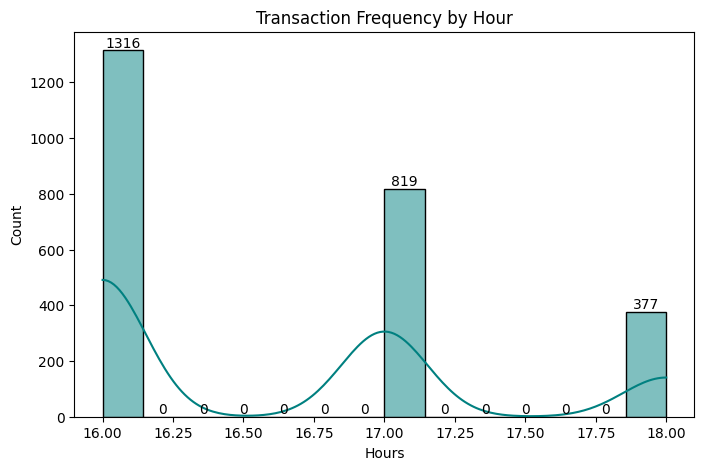

In [ ]:
# visualize the transaction frequency by hour using histogram
plt.figure(figsize=(8, 5))

# plot by frequency
ax = sns.histplot(x='TransactionDate_hour', data=df, kde=True, color='teal')

# add a label to each bar
for container in ax.containers:
  ax.bar_label(container)

plt.title('Transaction Frequency by Hour')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.grid(False)
plt.show()

> Berdasarkan visualisasi tersebut, transaksi paling banyak terjadi dalam rentang jam 16.00 hingga 18.00.

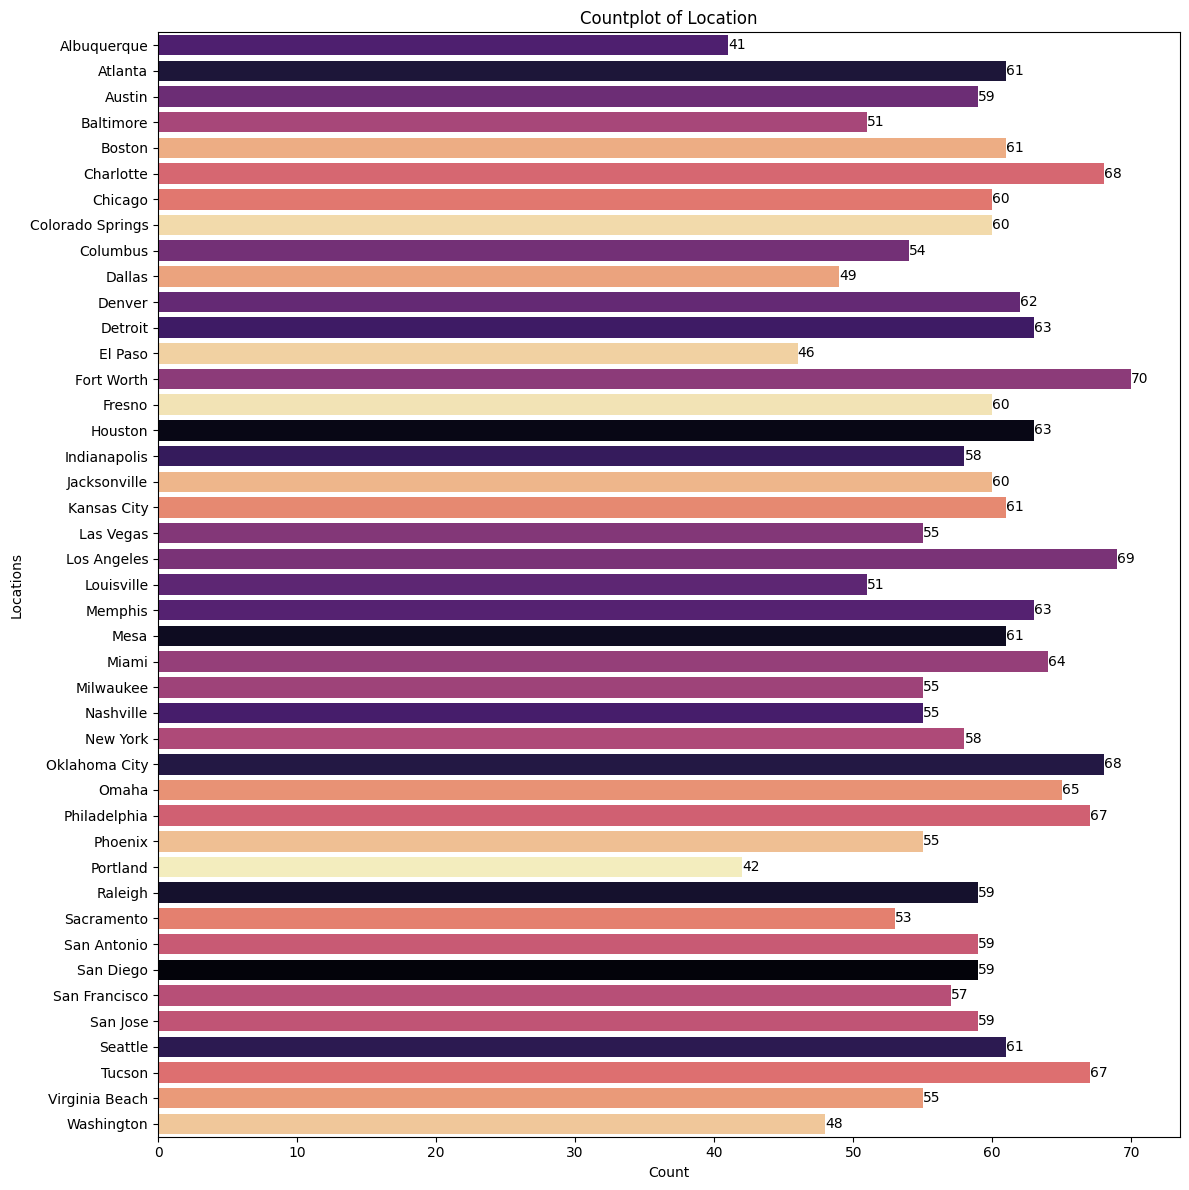

In [ ]:
# countplot visualization for Location column
plt.figure(figsize=(12, 12))

# plot locations ordered by alphabets
ax = sns.countplot(y='Location', data=df, order=df['Location'].sort_values(), palette='magma', hue='Location')

# add a label to each bar
for container in ax.containers:
  ax.bar_label(container)

# set title and axis labels
plt.title('Countplot of Location')
plt.ylabel('Locations')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

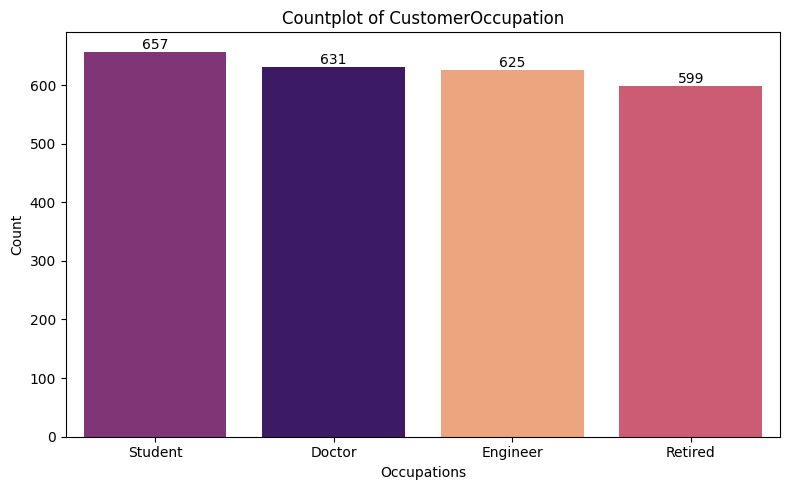

In [ ]:
# countplot visualization for CustomerOccupation column
plt.figure(figsize=(8, 5))

# plot the data ordered by frequency
ax = sns.countplot(x='CustomerOccupation', data=df, order=df['CustomerOccupation'].value_counts(ascending=False).index,
                   palette='magma', hue='CustomerOccupation')

# add a label to each bar
for container in ax.containers:
  ax.bar_label(container)

# set title and axis labels
plt.title('Countplot of CustomerOccupation')
plt.xlabel('Occupations')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

> Terlihat bahwa distribusi pelanggan jika ditinjau dari pekerjaannya cukup seragam.

In [ ]:
# function to plot pie chart

def pie_chart_viz(df):
  n_cols = 2
  n_rows = 1

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 6))
  sns.set_style('whitegrid')

  axes = axes.flatten()

  # pie chart for each column
  for i, col in enumerate(df.columns):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set2'))
    axes[i].set_title(f'Pie Chart of {col}')

  # adding a vertical line to separate plots
  line = plt.Line2D(
      [0.5, 0.5], [0.2, 0.8], color='black', linewidth=2, transform=fig.transFigure
  )
  fig.add_artist(line)
  fig.subplots_adjust(wspace=10)
  plt.tight_layout()
  plt.show()

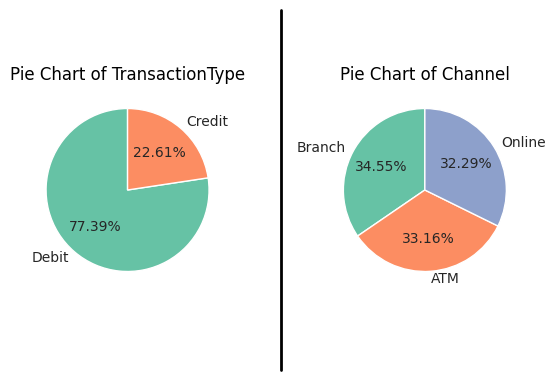

In [ ]:
# pie chart visualization for TransactionType and Channel
pie_chart_viz(df[['TransactionType', 'Channel']])

> Berdasarkan kedua pie chart di atas, terlihat bahwa mayoritas tipe transaksi yang dilakukan adalah melalui Debit. Sementara itu, persebaran channel transaksi yang digunakan cukup seragam.

## **b. Bivariate & Multivariate Analysis**

In [ ]:
# function to plot the correlation between two variables using scatterplot
def scatter_plot_viz(df, feature1, feature2, hue=None, title='Feature 1 vs. Feature 2'):
  plt.figure(figsize=(10, 6))
  sns.scatterplot(
      data=df,
      x=feature1,
      y=feature2,
      hue=hue,
      palette='magma',
      edgecolor='white',
      alpha=0.7)

  # set title and axis labels
  plt.title(title)
  plt.xlabel(feature1)
  plt.ylabel(feature2)

  plt.grid(True, linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()

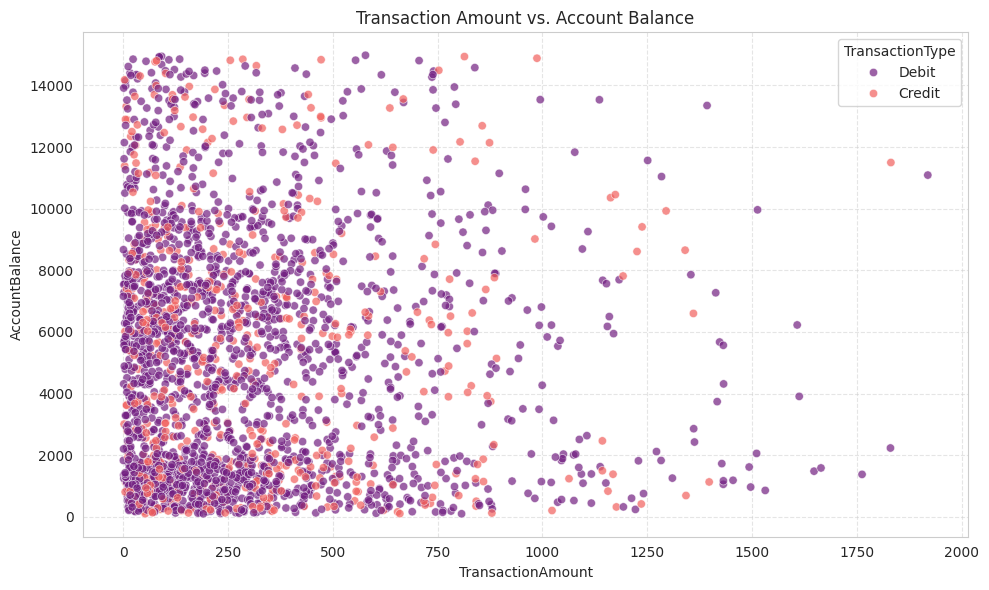

In [ ]:
# correlation between TransactionAmount and AccountBalance
scatter_plot_viz(df, 'TransactionAmount', 'AccountBalance', hue='TransactionType', title='Transaction Amount vs. Account Balance')

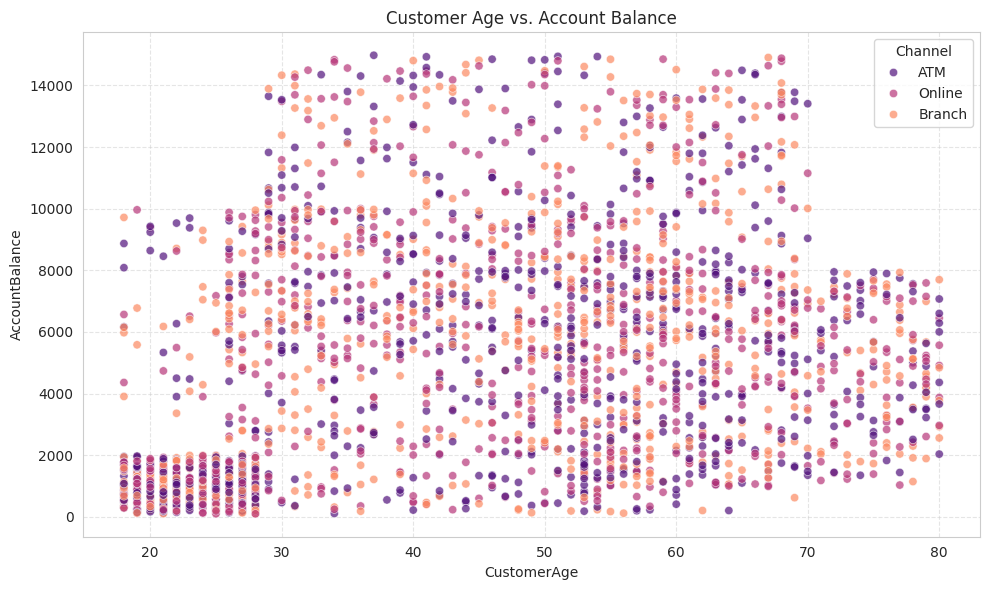

In [ ]:
# correlation between CustomerAge and AccountBalance
scatter_plot_viz(df, 'CustomerAge', 'AccountBalance', hue='Channel', title='Customer Age vs. Account Balance')

In [ ]:
# function to plot
def stack_bar_viz(df, feature1, hue=None, title='Feature 1 vs. Feature 2'):
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x=feature1, hue=hue, multiple='stack', palette='mako', kde=True)

  # set title and axis labels
  plt.title(title)
  plt.xlabel(feature1)

  plt.grid(False)
  plt.tight_layout()
  plt.show()

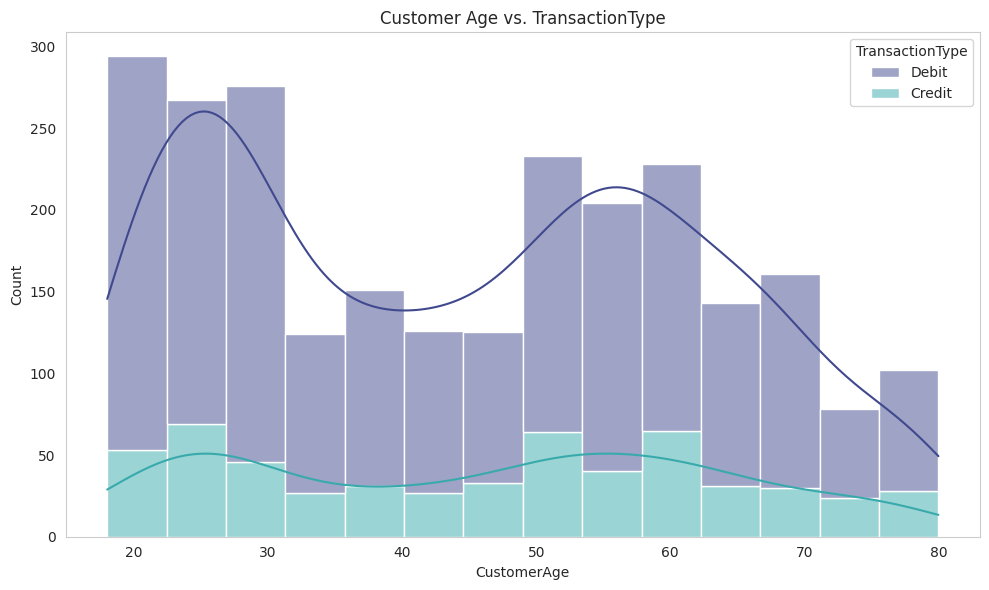

In [ ]:
# stackbar plot for CustomerAge and TransactionType
stack_bar_viz(df, 'CustomerAge', hue='TransactionType', title='Customer Age vs. TransactionType')

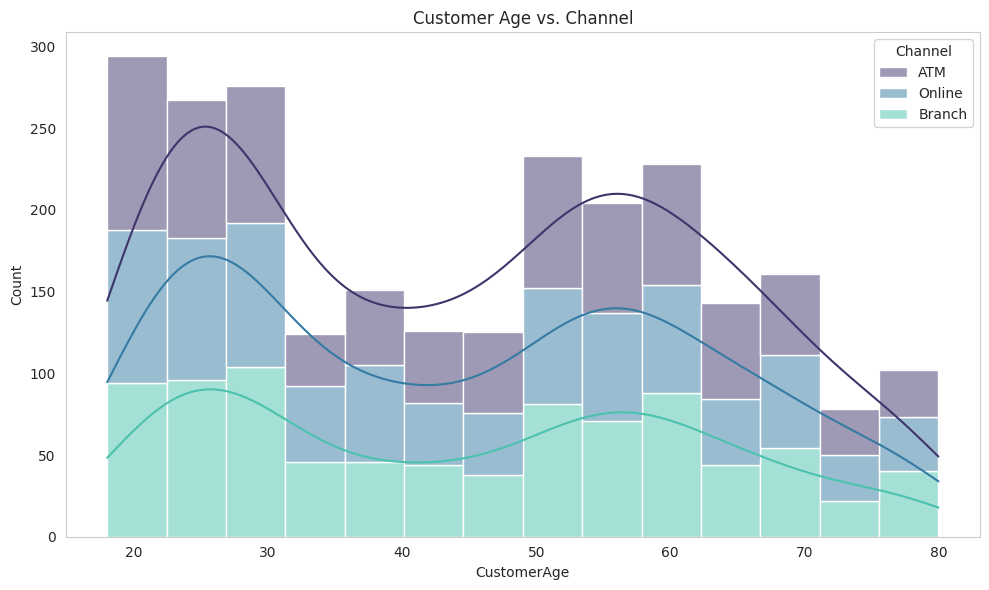

In [ ]:
# stackbar plot for CustomerAge and Channel
stack_bar_viz(df, 'CustomerAge', hue='Channel', title='Customer Age vs. Channel')

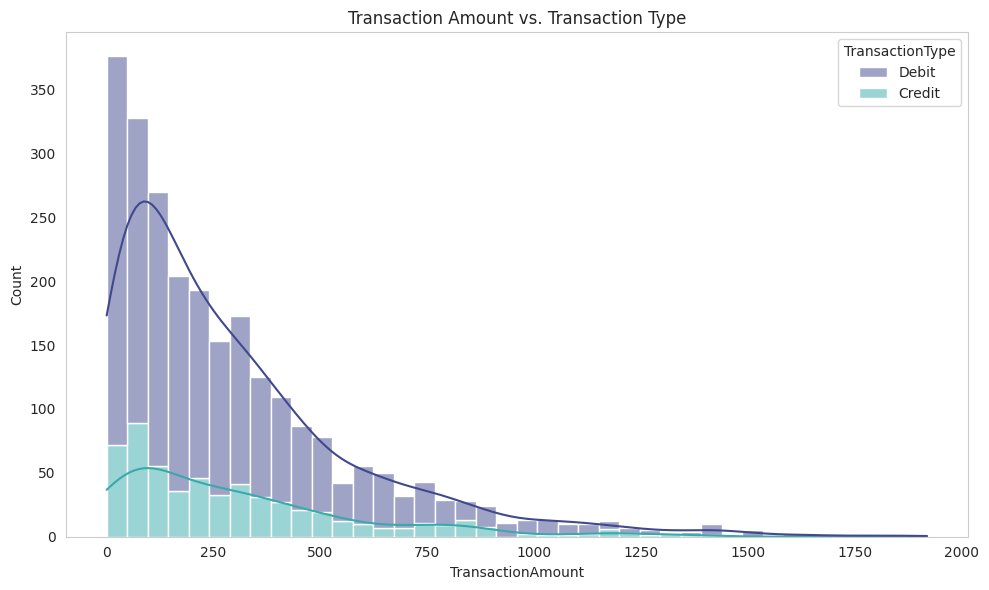

In [ ]:
# stackbar plot for TransactionAmount and TransactionType
stack_bar_viz(df, 'TransactionAmount', hue='TransactionType', title='Transaction Amount vs. Transaction Type')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

## **a. Missing Values**

In [ ]:
# function to print the number of missing values and percentage of each column
def check_null(df):
  count_null = df.isnull().sum().sort_values(ascending=False)
  percentage = (count_null / len(df)) * 100

  # create a tabular data that stores all missing values within each feature
  missing_values_data = pd.concat([count_null, percentage], keys=['Total Null', 'Percentage'], axis=1)

  total_null = missing_values_data['Total Null']

  if (total_null > 0).any(): # check if there are any missing values
    print(missing_values_data[total_null > 0])
  else:
    print('No missing values!')

In [ ]:
check_null(df)

No missing values!


> Dari hasil pengecekan terhadap *missing values* menggunakan fungsi `check_null()`, ditemukan tidak terdapat nilai yang hilang pada setiap kolom. Hal ini juga dapat dilihat melalui syntax `df.info()` yang dilakukan sebelumnya. Dengan begitu, tidak perlu ada *handling* yang dilakukan untuk kasus *missing values*.

## **b. Duplicated Data**

In [ ]:
# check duplicated data
df.duplicated().sum()

0

> Setelah diperiksa melalui fungsi `.duplicated().sum()`, tidak terdapat data duplikasi sehingga tidak perlu ada *handling*.

## **c. Outliers**

In [ ]:
# function to count outliers
def count_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)

  # IQR formula
  IQR = Q3-Q1
  RUB = Q3 + 1.5*IQR
  RLB = Q1 - 1.5*IQR

  # count outliers
  count = 0
  for x in df:
    if (x > RUB) or (x < RLB):
      count+=1

  return count, RUB, RLB

In [ ]:
# print all numerical features with outliers
for feature in num_features:
  total_outliers = count_outliers(num_features[feature])[0]
  if total_outliers > 0:
    print(f'Total outliers in {feature}: {total_outliers} or {(((total_outliers/len(num_features))) * 100):.2f}% of total data')

Total outliers in TransactionAmount: 113 or 4.50% of total data
Total outliers in LoginAttempts: 122 or 4.86% of total data
Total outliers in TransactionDate_year: 13 or 0.52% of total data


> Dari hasil pengecekan, terdapat *outliers* pada kolom `TransactionAmount` dan `LoginAttempts`. Hal ini masuk akal karena nilai yang berada di luar *range* normal data bisa jadi mengindikasikan terjadinya *fraud* pada transaksi. Dengan demikian, nilai *outliers* ini dianggap penting sehingga akan dibiarkan.

## **d. Feature Encoding**

In [ ]:
cat_features = df.select_dtypes('object')
cat_features

,AccountID,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation
0,AC00128,Debit,San Diego,D000380,162.198.218.92,M015,ATM,Doctor
1,AC00455,Debit,Houston,D000051,13.149.61.4,M052,ATM,Doctor
2,AC00019,Debit,Mesa,D000235,215.97.143.157,M009,Online,Student
3,AC00070,Debit,Raleigh,D000187,200.13.225.150,M002,Online,Student
4,AC00411,Credit,Atlanta,D000308,65.164.3.100,M091,Online,Student
...,...,...,...,...,...,...,...,...
2507,AC00297,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,Doctor
2508,AC00322,Debit,Tucson,D000410,49.174.157.140,M029,Branch,Doctor
2509,AC00095,Debit,San Diego,D000095,58.1.27.124,M087,Branch,Retired
2510,AC00118,Debit,Denver,D000634,21.190.11.223,M041,Online,Student


In [ ]:
# frequency encoding for AccountID, DeviceID, MerchantID, Location, and IP Address
def freq_encoding(df, feat):
  freq = df[feat].value_counts()
  df[feat]= df[feat].map(freq)
  df.rename(columns={feat: f'{feat}_encoded'}, inplace=True)
  return df

frequency_encoded_feats = ['AccountID', 'DeviceID', 'MerchantID', 'Location', 'IP Address']
for feat in frequency_encoded_feats:
  df = freq_encoding(df, feat)

> Salah satu teknik *categorical encoding* yang dipilih adalah ***frequency encoding***. Hal ini karena beberapa kolom seperti `AccountID`, `DeviceID`, `MerchantID`, `Location`, dan `IP Address` memiliki banyak sekali nilai unik yang tidak memiliki urutan.

In [ ]:
# one hot encoding for TransactionType, Channel, and CustomerOccupation
from sklearn.preprocessing import OneHotEncoder

ohe_encoder = OneHotEncoder(drop='first', sparse_output=False)

ohe_encoded_feats = ['TransactionType', 'Channel', 'CustomerOccupation']
for feat in ohe_encoded_feats:
  encoded_df = pd.DataFrame(ohe_encoder.fit_transform(df[[feat]]), columns=ohe_encoder.get_feature_names_out([feat]))

  df = pd.concat([df, encoded_df], axis=1)
  df.drop(columns=[feat], axis=1, inplace=True)

> Selanjutnya, untuk kolom `TransactionType`, `Channel`, dan `CustomerOccupation` diterapkan metode **One-Hot Encoding** karena ketiganya memiliki nilai unik yang masih terhitung sedikit (2-4 nilai unik) yang tidak memiliki urutan. Dilakukan juga penghapusan terhadap kolom pertama atau yang dijadikan baseline melalui parameter `drop='first'` untuk mengurangi jumlah kolom yang dihasilkan (mencegah *high-dimensionality*).

In [ ]:
# display final df after encoding
df

,AccountID_encoded,TransactionAmount,TransactionDate,Location_encoded,DeviceID_encoded,IP Address_encoded,MerchantID_encoded,CustomerAge,TransactionDuration,LoginAttempts,...,PreviousTransactionDate_month_sin,PreviousTransactionDate_month_cos,PreviousTransactionDate_hour_sin,PreviousTransactionDate_hour_cos,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,7,14.09,2023-04-11 16:29:14,59,6,3,32,70,81,1,...,-0.5,0.866025,0.866025,-0.5,1.0,0.0,0.0,0.0,0.0,0.0
1,7,376.24,2023-06-27 16:44:19,63,5,4,27,68,141,1,...,-0.5,0.866025,0.866025,-0.5,1.0,0.0,0.0,0.0,0.0,0.0
2,4,126.29,2023-07-10 18:16:08,61,5,7,30,19,56,1,...,-0.5,0.866025,0.866025,-0.5,1.0,0.0,1.0,0.0,0.0,1.0
3,8,184.50,2023-05-05 16:32:11,59,6,8,31,26,25,1,...,-0.5,0.866025,0.866025,-0.5,1.0,0.0,1.0,0.0,0.0,1.0
4,6,13.45,2023-10-16 17:51:24,61,3,4,31,26,198,1,...,-0.5,0.866025,0.866025,-0.5,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,10,856.21,2023-04-26 17:09:36,60,3,1,15,33,109,1,...,-0.5,0.866025,0.866025,-0.5,0.0,1.0,0.0,0.0,0.0,0.0
2508,9,251.54,2023-03-22 17:36:48,67,5,5,25,48,177,1,...,-0.5,0.866025,0.866025,-0.5,1.0,1.0,0.0,0.0,0.0,0.0
2509,8,28.63,2023-08-21 17:08:50,59,5,4,25,56,146,1,...,-0.5,0.866025,0.866025,-0.5,1.0,1.0,0.0,0.0,1.0,0.0
2510,4,185.97,2023-02-24 16:24:46,62,2,6,20,23,19,1,...,-0.5,0.866025,0.866025,-0.5,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   AccountID_encoded                  2512 non-null   int64         
 1   TransactionAmount                  2512 non-null   float64       
 2   TransactionDate                    2512 non-null   datetime64[ns]
 3   Location_encoded                   2512 non-null   int64         
 4   DeviceID_encoded                   2512 non-null   int64         
 5   IP Address_encoded                 2512 non-null   int64         
 6   MerchantID_encoded                 2512 non-null   int64         
 7   CustomerAge                        2512 non-null   int64         
 8   TransactionDuration                2512 non-null   int64         
 9   LoginAttempts                      2512 non-null   int64         
 10  AccountBalance                     2

## **e. Feature Scaling**

In [ ]:
# drop the original TransactionDate and PreviousTransactionDate columns
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], axis=1, inplace=True)

> Sebelum dilakukan *feature scaling*, kolom yang masih bertipe datetime dihapus karena sebelumnya juga sudah diekstraksi beberapa komponen penting, seperti jam, hari, bulan, dan tahun. Hal ini juga dilakukan untuk menghindari terjadinya *error* saat proses *scaling*.

In [ ]:
# data scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# convert df_scaled to dataframe to be used in further analysis
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled

,AccountID_encoded,TransactionAmount,Location_encoded,DeviceID_encoded,IP Address_encoded,MerchantID_encoded,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,...,PreviousTransactionDate_month_sin,PreviousTransactionDate_month_cos,PreviousTransactionDate_hour_sin,PreviousTransactionDate_hour_cos,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.394950,-0.971275,-0.028446,0.780834,-1.059021,1.141666,1.423718,-0.552443,-0.206794,-0.000537,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,0.540538,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128
1,0.394950,0.269440,0.598373,0.235683,-0.568379,0.168981,1.311287,0.305314,-0.206794,2.216472,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,0.540538,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128
2,-0.936152,-0.586882,0.284963,0.235683,0.903547,0.752592,-1.443277,-0.909842,-0.206794,-1.023534,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,0.540538,-0.726623,1.448244,-0.575512,-0.559572,1.680309
3,0.838651,-0.387456,-0.028446,0.780834,1.394189,0.947129,-1.049768,-1.353017,-0.206794,0.885797,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,0.540538,-0.726623,1.448244,-0.575512,-0.559572,1.680309
4,-0.048751,-0.973468,0.284963,-0.854621,-0.568379,0.947129,-1.049768,1.120184,-0.206794,0.593589,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,-1.850010,-0.726623,1.448244,-0.575512,-0.559572,1.680309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.726052,1.913802,0.128258,-0.854621,-2.040306,-2.165463,-0.656259,-0.152156,-0.206794,1.942606,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,-1.850010,1.376230,-0.690491,-0.575512,-0.559572,-0.595128
2508,1.282351,-0.157779,1.225192,0.235683,-0.077737,-0.220093,0.186975,0.819969,-0.206794,-1.245986,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,0.540538,1.376230,-0.690491,-0.575512,-0.559572,-0.595128
2509,0.838651,-0.921462,-0.028446,0.235683,-0.568379,-0.220093,0.636700,0.376794,-0.206794,-0.443928,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,0.540538,1.376230,-0.690491,-0.575512,1.787080,-0.595128
2510,-0.936152,-0.382420,0.441668,-1.399772,0.412905,-1.192778,-1.218415,-1.438793,-0.206794,-0.855705,...,-1.110223e-16,0.0,1.110223e-16,1.110223e-16,0.540538,-0.726623,1.448244,-0.575512,-0.559572,1.680309


In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AccountID_encoded                  2512 non-null   float64
 1   TransactionAmount                  2512 non-null   float64
 2   Location_encoded                   2512 non-null   float64
 3   DeviceID_encoded                   2512 non-null   float64
 4   IP Address_encoded                 2512 non-null   float64
 5   MerchantID_encoded                 2512 non-null   float64
 6   CustomerAge                        2512 non-null   float64
 7   TransactionDuration                2512 non-null   float64
 8   LoginAttempts                      2512 non-null   float64
 9   AccountBalance                     2512 non-null   float64
 10  TransactionDate_day                2512 non-null   float64
 11  TransactionDate_month              2512 non-null   float

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

> Berikut adalah beberapa fungsi yang akan digunakan selama pembangunan model, yaitu fungsi `det_best_cluster` untuk menentukan jumlah cluster optimal berdasarkan elbow method dan silhouette score, serta fungsi `kmeans_cluster_viz`, yaitu fungsi untuk melakukan visualisasi cluster.




In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# function to determine the optimum # of clusters based on elbow method & silhouette score
def det_best_cluster(df, min_cluster=2, max_cluster=10):
  range_of_clusters = range(min_cluster, max_cluster+1)
  inertia = []
  silhouette_scores = []

  for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df)
    # inertias
    inertia.append(kmeans.inertia_)
    # silhouette scores
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

  # plot the elbow method and silhouette score side by side
  plt.figure(figsize=(14,6))

  # elbow method plot
  plt.subplot(1, 2, 1)
  plt.plot(range_of_clusters, inertia, marker='o', c='orange')
  plt.title('Elbow Method')
  plt.xlabel('# of Clusters')
  plt.ylabel('Inertia')

  # silhouette score plot
  plt.subplot(1, 2, 2)
  plt.plot(range_of_clusters, silhouette_scores, marker='o')
  plt.title('Silhouette Score of Each Cluster')
  plt.xlabel('# of Clusters')
  plt.ylabel('Silhouette Score')

  plt.show()

  print()

  # the optimum clusters based on the max silhouette score
  best_n_clusters_score = range_of_clusters[np.argmax(silhouette_scores)]

  # the optimum clusters based on the elbow point
  slope_changes = np.diff(inertia, 2)
  elbow_point = np.argmin(slope_changes) + 2

  best_n_clusters_elbow = range_of_clusters[np.argmax(inertia)]
  print(f'The best number of clusters based on the max silhouette score generated: {best_n_clusters_score}')
  print(f'The best number of clusters based on the min inertia (elbow method): {elbow_point}')

  return best_n_clusters_score, elbow_point

In [ ]:
# function to visualize clusters
def kmeans_cluster_viz(labels, centroids, df, xlabel='PC1', ylabel='PC2'):
  plt.figure(figsize=(12, 8))
  plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='viridis',
              alpha=0.6, s=50, marker='o', edgecolor='w', label='Data Points') # plot data
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Centroids', marker='x', s=200) # plot centroids

  # add a label for each centroid
  for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red',
            ha='center', va='center', fontsize=12, bbox=dict(facecolor='w', alpha=0.7, edgecolor='red'))

  plt.title('Clusters with Centroid Visualization')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()

  plt.show()

### **K-Means Clustering**

#### **Sebelum Feature Selection**

> Dataframe setelah dibersihkan memiliki total 35 fitur. Jumlah fitur ini terlalu banyak sehingga visualisasi KMeans akan menjadi kurang optimal dan dapat menimbulkan *curse of dimensionality*. Oleh karena itu, akan dilakukan reduksi dimensi menggunakan PCA dengan menghasilkan *2 principal components* untuk mempermudah proses visualisasi.

In [ ]:
# apply PCA with 2 principal components to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca_2 = pca.fit_transform(df_scaled)

# explain the variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio for 2 principal components: {explained_variance}')
print(f'Total cumulative variance explained by the two principal components: {np.sum(explained_variance):.2%}')

Explained variance ratio for 2 principal components: [0.11422351 0.09001421]
Total cumulative variance explained by the two principal components: 20.42%


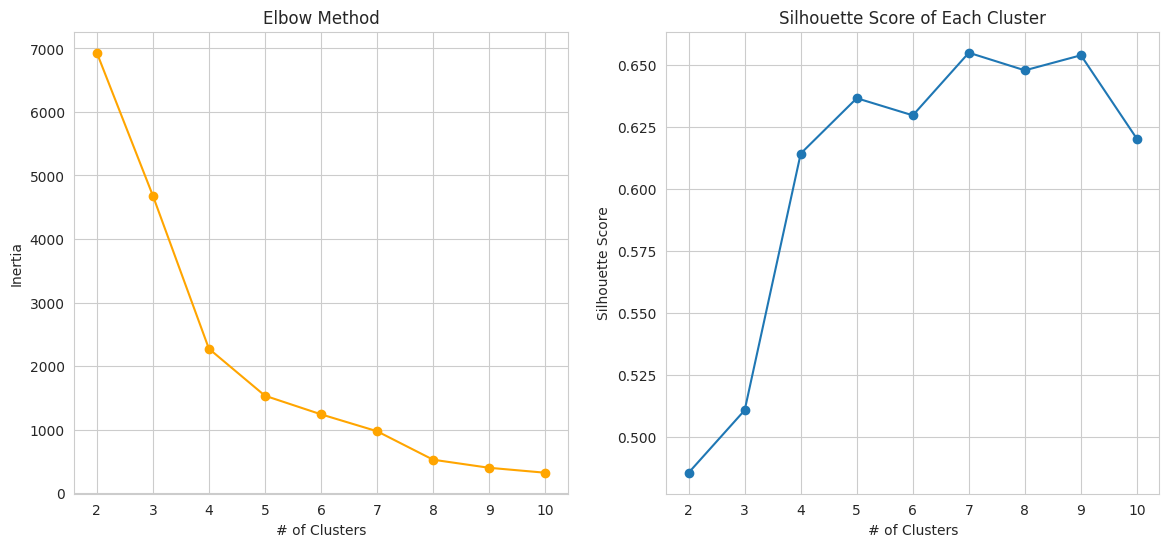


The best number of clusters based on the max silhouette score generated: 7
The best number of clusters based on the min inertia (elbow method): 6


(7, 6)

In [ ]:
# determine the best clusters based on the optimum silhouette score
det_best_cluster(df_pca_2)

> Berdasarkan visualisasi, hasil penentuan cluster yang optimal berdasarkan elbow method adalah 6, sedangkan silhouette score adalah 7. Selanjutnya, akan ditampilkan perbandingan visualisasi dan silhouette score terhadap 6 dan 7 kluster.

In [ ]:
# K-Means Clustering with 6 and 7 clusters based on the result above
from sklearn.cluster import KMeans

kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(df_pca_2)

kmeans_7 = KMeans(n_clusters=7, random_state=42)
kmeans_7.fit(df_pca_2)

KMeans(n_clusters=7, random_state=42)

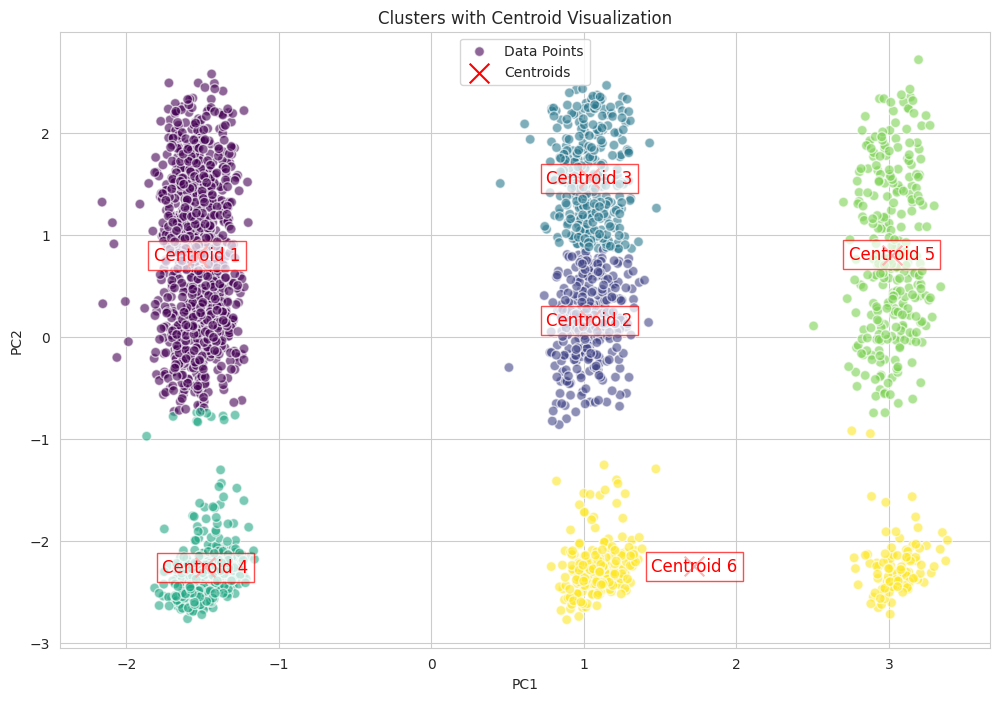

In [ ]:
# 6 clusters visualization
labels_6 = kmeans_6.labels_
centroids_6 = kmeans_6.cluster_centers_
kmeans_cluster_viz(labels_6, centroids_6, df_pca_2)

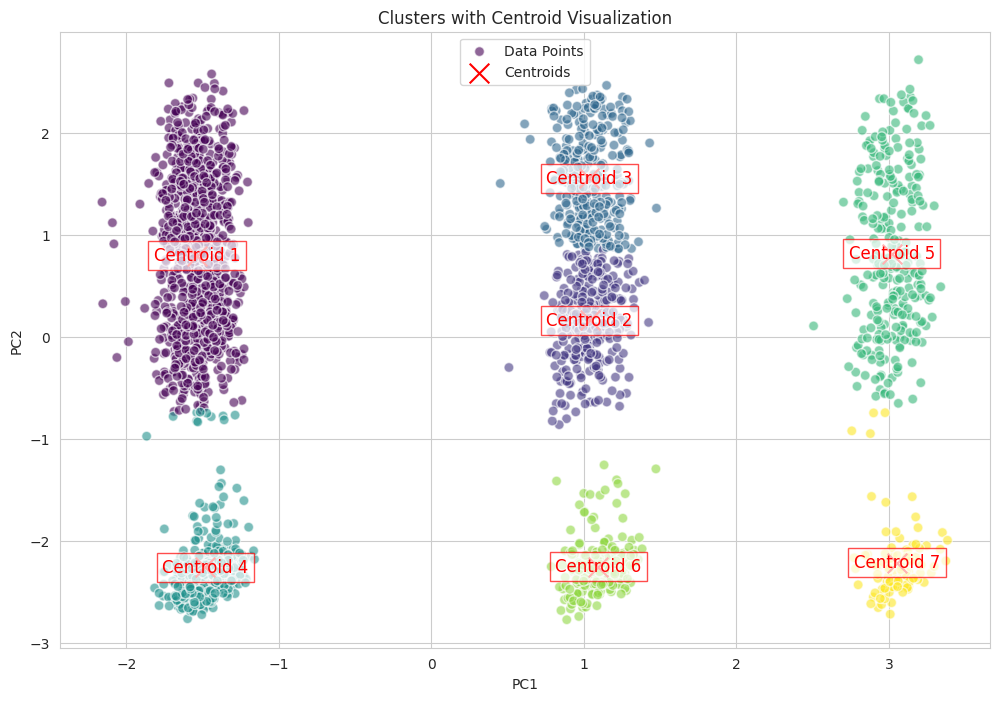

In [ ]:
# 7 clusters visualization
labels_7 = kmeans_7.labels_
centroids_7 = kmeans_7.cluster_centers_
kmeans_cluster_viz(labels_7, centroids_7, df_pca_2)

> Berdasarkan visualisasi, hasil 7 cluster terlihat lebih baik dibandingkan 6 cluster. Walaupun begitu, letak centroid 2 dan centroid 3 terlalu berdekatan dan akan lebih baik jika cluster tersebut dapat tergabung menjadi 1.


In [ ]:
# silhouette scores comparison between 6 and 7 clusters
from sklearn.metrics import silhouette_score

silhouette_avg_6 = silhouette_score(df_pca_2, labels_6)
silhouette_avg_7 = silhouette_score(df_pca_2, labels_7)

print(f'Silhouette score (avg.) of 6 clusters: {silhouette_avg_6:.2f} vs. Silhouette score (avg.) of 7 clusters: {silhouette_avg_7:.2f}')

Silhouette score (avg.) of 6 clusters: 0.63 vs. Silhouette score (avg.) of 7 clusters: 0.65


> Perbandingan nilai silhouette score antara 6 dan 7 cluster menunjukakn perbedaan yang tidak terlalu besar, hanya sekitar 0.02. Meskipun perbedaannya kecil, nilai silhouette score lebih tinggi pada 7 cluster, yang menunjukkan sedikit peningkatan dalam kualitas pemisahan cluster.



#### **Setelah Feature Selection**

In [ ]:
# feature selection using embedded method: random forest classifier
kmeans_feat_select = KMeans(random_state=42)
labels_feat_select = kmeans_feat_select.fit_predict(df_scaled)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_scaled, labels_feat_select)

# get important features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # sort from the most important features

# get only the 13 most important features
important_feats_names = df_scaled.columns[indices[:13]]

# print the selected features with their respective importances score
important_feats = pd.Series(importances[indices[:13]], index=important_feats_names)
print(important_feats)

CustomerOccupation_Retired     0.165485
CustomerOccupation_Student     0.124920
CustomerAge                    0.121369
CustomerOccupation_Engineer    0.103150
TransactionDate_hour           0.081899
TransactionDate_hour_cos       0.081439
TransactionDate_hour_sin       0.079774
AccountBalance                 0.075820
TransactionDate_month          0.050346
TransactionDate_month_sin      0.043684
TransactionDate_month_cos      0.009632
TransactionAmount              0.009609
TransactionDuration            0.009263
dtype: float64


In [ ]:
# create a new df storing the 13 selected features
df_selected = df_scaled[important_feats_names]
df_selected

,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge,CustomerOccupation_Engineer,TransactionDate_hour,TransactionDate_hour_cos,TransactionDate_hour_sin,AccountBalance,TransactionDate_month,TransactionDate_month_sin,TransactionDate_month_cos,TransactionAmount,TransactionDuration
0,-0.559572,-0.595128,1.423718,-0.575512,-0.856729,-0.847623,0.935219,-0.000537,-0.737432,1.267745,-0.729430,-0.971275,-0.552443
1,-0.559572,-0.595128,1.311287,-0.575512,-0.856729,-0.847623,0.935219,2.216472,-0.161875,0.037597,-1.434162,0.269440,0.305314
2,-0.559572,1.680309,-1.443277,-0.575512,1.879574,1.910252,-1.443304,-1.023534,0.125903,-0.672630,-1.245329,-0.586882,-0.909842
3,-0.559572,1.680309,-1.049768,-0.575512,-0.856729,-0.847623,0.935219,0.885797,-0.449653,0.747823,-1.245329,-0.387456,-1.353017
4,-0.559572,1.680309,-1.049768,-0.575512,0.511423,0.482671,-0.838367,0.593589,0.989238,-1.192552,0.680035,-0.973468,1.120184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,-0.559572,-0.595128,-0.656259,-0.575512,0.511423,0.482671,-0.838367,1.942606,-0.737432,1.267745,-0.729430,1.913802,-0.152156
2508,-0.559572,-0.595128,0.186975,-0.575512,0.511423,0.482671,-0.838367,-1.245986,-1.025210,1.458050,-0.024697,-0.157779,0.819969
2509,1.787080,-0.595128,0.636700,-0.575512,0.511423,0.482671,-0.838367,-0.443928,0.413681,-1.192552,-0.729430,-0.921462,0.376794
2510,-0.559572,1.680309,-1.218415,-0.575512,-0.856729,-0.847623,0.935219,-0.855705,-1.312988,1.267745,0.680035,-0.382420,-1.438793


In [ ]:
# re-applying PCA with the new df after feature selection
pca = PCA(n_components=2)
df_selected_pca = pca.fit_transform(df_selected)

new_explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio for the 2 principal components of new df: {new_explained_variance}')
print(f'Total cumulative variance explained by the new two principal components: {np.sum(new_explained_variance):.2%}')

Explained variance ratio for the 2 principal components of new df: [0.22734524 0.17948748]
Total cumulative variance explained by the new two principal components: 40.68%


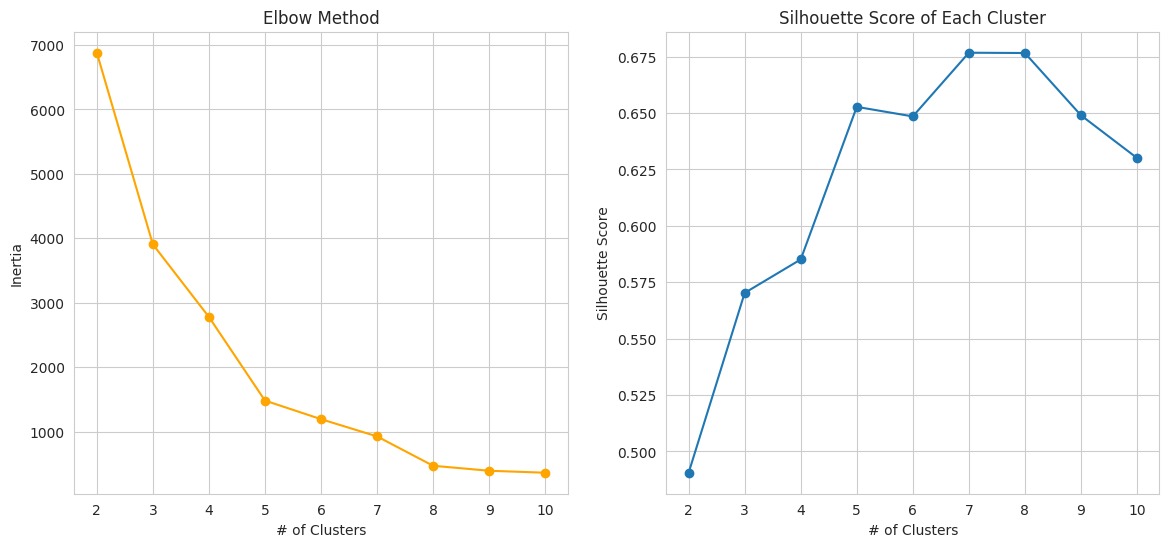


The best number of clusters based on the max silhouette score generated: 7
The best number of clusters based on the min inertia (elbow method): 6


(7, 6)

In [ ]:
det_best_cluster(df_selected_pca)

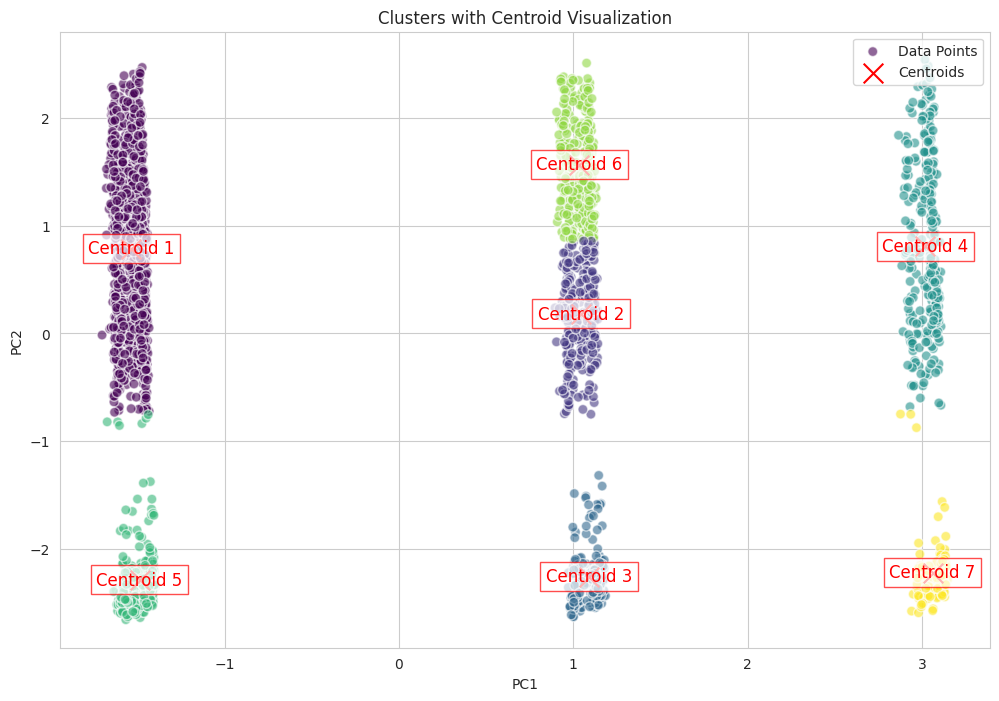

In [ ]:
# kmeans with 7 clusters after doing feature selection and pca
kmeans_feat_select = KMeans(n_clusters=7, random_state=42)
labels_feat_select = kmeans_feat_select.fit_predict(df_selected_pca)
centroids_feat_select = kmeans_feat_select.cluster_centers_

kmeans_cluster_viz(labels_feat_select, centroids_feat_select, df_selected_pca)

In [ ]:
silhouette_score_feat_select = silhouette_score(df_selected_pca, labels_feat_select)
print(f'New silhouette score after feature selection (average): {silhouette_score_feat_select:.2f}')

New silhouette score after feature selection (average): 0.68


> Setelah dilakukan feature selection menggunakan metode embedded (dengan random forest classifier), dipilih 13 fitur yang paling berkontribusi terhadap hasil pembentukan cluster. Fitur-fitur ini kemudian diterapkan PCA yang mencakup 40.68% dari total variansi data. Dengan pendekatan ini, diperoleh 7 cluster dengan silhouette score sebesar 0.68, sedikit lebih baik dibandingkan tanpa menggunakan feature selection. Oleh karena itu, tahapan analisis akhir akan menggunakan ketigabelas fitur hasil seleksi untuk kemudian dilakukan interpretasi terhadap setiap cluster yang terbentuk.



## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# create a copy of the original dataframe (before encoding and scaling) with the selected features only as a final df
final_df = df[df_selected.columns]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerOccupation_Retired   2512 non-null   float64
 1   CustomerOccupation_Student   2512 non-null   float64
 2   CustomerAge                  2512 non-null   int64  
 3   CustomerOccupation_Engineer  2512 non-null   float64
 4   TransactionDate_hour         2512 non-null   int32  
 5   TransactionDate_hour_cos     2512 non-null   float64
 6   TransactionDate_hour_sin     2512 non-null   float64
 7   AccountBalance               2512 non-null   float64
 8   TransactionDate_month        2512 non-null   int32  
 9   TransactionDate_month_sin    2512 non-null   float64
 10  TransactionDate_month_cos    2512 non-null   float64
 11  TransactionAmount            2512 non-null   float64
 12  TransactionDuration          2512 non-null   int64  
dtypes: float64(9), int

In [ ]:
# function to decode occupation
def decode_occupation(row):
  if row['CustomerOccupation_Retired'] == 1:
    return 'Retired'
  elif row['CustomerOccupation_Student'] == 1:
    return 'Student'
  elif row['CustomerOccupation_Engineer'] == 1:
    return 'Engineer'
  else:
    return 'Doctor'

In [ ]:
# apply decoder and drop encoded occupation columns
final_df['CustomerOccupation'] = final_df.apply(decode_occupation, axis=1)
final_df.drop(columns=['CustomerOccupation_Retired', 'CustomerOccupation_Student', 'CustomerOccupation_Engineer'], axis=1, inplace=True)

<ipython-input-56-c82977e12904>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['CustomerOccupation'] = final_df.apply(decode_occupation, axis=1)
<ipython-input-56-c82977e12904>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['CustomerOccupation_Retired', 'CustomerOccupation_Student', 'CustomerOccupation_Engineer'], axis=1, inplace=True)


In [ ]:
# create a column representing clusters from 1-7
final_df['Cluster'] = labels_feat_select + 1

<ipython-input-57-f83bf4f98b9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Cluster'] = labels_feat_select + 1


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerAge                2512 non-null   int64  
 1   TransactionDate_hour       2512 non-null   int32  
 2   TransactionDate_hour_cos   2512 non-null   float64
 3   TransactionDate_hour_sin   2512 non-null   float64
 4   AccountBalance             2512 non-null   float64
 5   TransactionDate_month      2512 non-null   int32  
 6   TransactionDate_month_sin  2512 non-null   float64
 7   TransactionDate_month_cos  2512 non-null   float64
 8   TransactionAmount          2512 non-null   float64
 9   TransactionDuration        2512 non-null   int64  
 10  CustomerOccupation         2512 non-null   object 
 11  Cluster                    2512 non-null   int32  
dtypes: float64(6), int32(3), int64(2), object(1)
memory usage: 206.2+ KB


In [ ]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerAge,2512.0,44.673965,17.792198,18.00,27.000000,4.500000e+01,59.000000,8.000000e+01
TransactionDate_hour,2512.0,16.626194,0.731059,16.00,16.000000,1.600000e+01,17.000000,1.800000e+01
TransactionDate_hour_cos,2512.0,-0.346327,0.181335,-0.50,-0.500000,-5.000000e-01,-0.258819,-1.836970e-16
TransactionDate_hour_sin,2512.0,-0.918703,0.056338,-1.00,-0.965926,-8.660254e-01,-0.866025,-8.660254e-01
AccountBalance,2512.0,5114.302966,3900.942499,101.25,1504.370000,4.735510e+03,7678.820000,1.497799e+04
TransactionDate_month,2512.0,6.562500,3.475590,1.00,3.000000,7.000000e+00,10.000000,1.200000e+01
TransactionDate_month_sin,2512.0,-0.026468,0.704141,-1.00,-0.866025,-2.449294e-16,0.500000,1.000000e+00
TransactionDate_month_cos,2512.0,0.017523,0.709631,-1.00,-0.500000,6.123234e-17,0.866025,1.000000e+00
TransactionAmount,2512.0,297.593778,291.946243,0.26,81.885000,2.111400e+02,414.527500,1.919110e+03
TransactionDuration,2512.0,119.643312,69.963757,10.00,63.000000,1.125000e+02,161.000000,3.000000e+02


In [ ]:
final_df.describe(include='object')

,CustomerOccupation
count,2512
unique,4
top,Student
freq,657


In [ ]:
# create a cluster summary of numerical features based on the mean of the data in each cluster
num_feat_final = final_df.select_dtypes('number').columns

cluster_summary = final_df[num_feat_final].groupby('Cluster').mean().round(0)
cluster_summary

,CustomerAge,TransactionDate_hour,TransactionDate_hour_cos,TransactionDate_hour_sin,AccountBalance,TransactionDate_month,TransactionDate_month_sin,TransactionDate_month_cos,TransactionAmount,TransactionDuration
Cluster,,,,,,,,,,
1,52.0,16.0,-1.0,-1.0,6335.0,7.0,-0.0,0.0,290.0,120.0
2,42.0,17.0,-0.0,-1.0,6350.0,6.0,0.0,0.0,306.0,120.0
3,23.0,17.0,-0.0,-1.0,1739.0,7.0,0.0,0.0,303.0,118.0
4,52.0,18.0,-0.0,-1.0,6203.0,7.0,-0.0,-0.0,267.0,116.0
5,23.0,16.0,-1.0,-1.0,1492.0,6.0,-0.0,-0.0,329.0,121.0
6,64.0,17.0,-0.0,-1.0,6810.0,7.0,-0.0,-0.0,297.0,119.0
7,23.0,18.0,-0.0,-1.0,1431.0,7.0,-0.0,0.0,307.0,126.0


In [ ]:
# display the occupation mode in each cluster
occupation_mode_per_cluster = final_df.groupby('Cluster')['CustomerOccupation'].agg(pd.Series.mode)
occupation_mode_per_cluster

,CustomerOccupation
Cluster,
1,Engineer
2,Engineer
3,Student
4,Engineer
5,Student
6,Retired
7,Student


In [ ]:
# merge the cluster summaries to create a final cluster summary
cluster_summary = pd.concat([cluster_summary, occupation_mode_per_cluster], axis=1)
cluster_summary

,CustomerAge,TransactionDate_hour,TransactionDate_hour_cos,TransactionDate_hour_sin,AccountBalance,TransactionDate_month,TransactionDate_month_sin,TransactionDate_month_cos,TransactionAmount,TransactionDuration,CustomerOccupation
Cluster,,,,,,,,,,,
1,52.0,16.0,-1.0,-1.0,6335.0,7.0,-0.0,0.0,290.0,120.0,Engineer
2,42.0,17.0,-0.0,-1.0,6350.0,6.0,0.0,0.0,306.0,120.0,Engineer
3,23.0,17.0,-0.0,-1.0,1739.0,7.0,0.0,0.0,303.0,118.0,Student
4,52.0,18.0,-0.0,-1.0,6203.0,7.0,-0.0,-0.0,267.0,116.0,Engineer
5,23.0,16.0,-1.0,-1.0,1492.0,6.0,-0.0,-0.0,329.0,121.0,Student
6,64.0,17.0,-0.0,-1.0,6810.0,7.0,-0.0,-0.0,297.0,119.0,Retired
7,23.0,18.0,-0.0,-1.0,1431.0,7.0,-0.0,0.0,307.0,126.0,Student


> Dataframe `cluster_summary` di atas adalah hasil penggabungan informasi dari fitur-fitur terpilih terhadap setiap cluster.

###**Analisis Cluster**:

1. **Cluster 1** ->
Customer dengan:
- **Usia rata-rata**: 52 tahun
- **Mayoritas pekerjaan**: Engineer
- **Waktu transaksi (rata-rata)**: 16.00 (pukul 4 sore)
- **Bulan transaksi (rata-rata)**: bulan ke-7 (Juli)
- **Saldo akun (rata-rata)**: 6.335 USD
- **Nilai transaksi (rata-rata)**: 290 USD
- **Durasi transaksi (rata-rata)**: 120 detik

2. **Cluster 2**->
Customer dengan:
- **Usia rata-rata**: 42 tahun
- **Mayoritas pekerjaan**: Engineer
- **Waktu transaksi (rata-rata)**: 17.00 (pukul 5 sore)
- **Bulan transaksi (rata-rata)**: bulan ke-6 (Juni)
- **Saldo akun (rata-rata)**: 6.350 USD
- **Nilai transaksi (rata-rata)**: 306 USD
- **Durasi transaksi (rata-rata)**: 120 detik

3. **Cluster 3**->
Customer dengan:
- **Usia rata-rata**: 23 tahun
- **Mayoritas pekerjaan**: Student
- **Waktu transaksi (rata-rata)**: 17.00 (pukul 5 sore)
- **Bulan transaksi (rata-rata)**: bulan ke-7 (Juli)
- **Saldo akun (rata-rata)**: 1.739 USD
- **Nilai transaksi (rata-rata)**: 303 USD
- **Durasi transaksi (rata-rata)**: 118 detik

4. **Cluster 4**->
Customer dengan:
- **Usia rata-rata**: 52 tahun
- **Mayoritas pekerjaan**: Engineer
- **Waktu transaksi (rata-rata)**: 18.00 (pukul 6 sore)
- **Bulan transaksi (rata-rata)**: bulan ke-7 (Juli)
- **Saldo akun (rata-rata)**: 6.203 USD
- **Nilai transaksi (rata-rata)**: 267 USD
- **Durasi transaksi (rata-rata)**: 116 detik

5. **Cluster 5**->
Customer dengan:
- **Usia rata-rata**: 23 tahun
- **Mayoritas pekerjaan**: Student
- **Waktu transaksi (rata-rata)**: 16.00 (pukul 4 sore)
- **Bulan transaksi (rata-rata)**: bulan ke-6 (Juni)
- **Saldo akun (rata-rata)**: 1.492 USD
- **Nilai transaksi (rata-rata)**: 329 USD
- **Durasi transaksi (rata-rata)**: 121 detik

6. **Cluster 6**->
Customer dengan:
- **Usia rata-rata**: 64 tahun
- **Mayoritas pekerjaan**: Pensiunan (Retired)
- **Waktu transaksi (rata-rata)**: 17.00 (pukul 5 sore)
- **Bulan transaksi (rata-rata)**: bulan ke-7 (Juli)
- **Saldo akun (rata-rata)**: 6.810 USD
- **Nilai transaksi (rata-rata)**: 297 USD
- **Durasi transaksi (rata-rata)**: 119 detik

7. **Cluster 7**->
Customer dengan:
- **Usia rata-rata**: 23 tahun
- **Mayoritas pekerjaan**: Student
- **Waktu transaksi (rata-rata)**: 18.00 (pukul 6 sore)
- **Bulan transaksi (rata-rata)**: bulan ke-7 (Juli)
- **Saldo akun (rata-rata)**: 1.431 USD
- **Nilai transaksi (rata-rata)**: 307 USD
- **Durasi transaksi (rata-rata)**: 126 detik

###**Hasil Interpretasi**:

>  Cluster **1**, **2**, dan **4** mendeskripsikan kumpulan customer berusia **40-50 tahun** dengan mayoritas pekerjaan sebagai **Engineer**. Ketiga cluster memiliki saldo akun (`AccountBalance`) yang **relatif besar** (6.000 - 6.500 USD) dan nilai transaksi (`TransactionAmount`) di rentang 267 - 306 USD. Perbandingan ini menunjukkan pengeluaran yang cukup **moderat** yang berarti mereka cenderung melakukan transaksi dengan jumlah yang sedang-besar.

> Cluster **3**, **5**, dan **7** mendeskripsikan kumpulan customer berusia **di bawah 30 tahun** yang mayoritasnya merupakan **Student**. Ketiga cluster ini memiliki saldo akun (`AccountBalance`) yang jauh lebih sedikit dibanding ketiga clusters sebelumnya dimana hal ini cukup wajar karena mayoritas customer yang masih merupakan Student. Akan tetapi, nilai transaksi (`TransactionAmount`) ketiga cluster ini tergolong **cukup tinggi** (berkisar di antara 303 - 329 USD) mengingat saldo akun mereka yang di bawah 2000 USD. Hal ini menggambarkan perilaku customer yang cukup **konsumtif**.

> Cluster **6** adalah satu-satunya cluster yang mendeskripsikan kumpulan customer berusia **60 tahun ke atas** dan merupakan **pensiunan**. Customer pada cluster ini memiliki saldo akun (`AccountBalance`) yang cukup besar (mendekati 7000 USD), tetapi rata-rata nilai transaksi (`TransactionAmount`) yang sangat sedikit (mendekati 300 USD). Hal ini menggambarkan perilaku dan gaya hidup customer yang cukup **hemat**.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# save the cluster summary as csv
cluster_summary.to_csv('cluster_summary.csv')

# save the final df as csv
final_df.to_csv('clustered_data.csv', index=False)